# *I. Introduction*

### [Domain - Specific Area] 

#### Dengue cases and prediction in Singapore 

Dengue fever is a disease caused by the dengue virus; it is spread by the *Aedes aegypti* mosquito which are rampant in tropical islands such as Singapore. Weather also plays an important correlation on the rising number of dengue incidents. This is likely due to Singapore having high average temperatures and precipitation rate across the entire island, stagnant puddles in warm temperatures becomes breeding grounds for these mosquitos.

Given a dataset about dengue occurrences, alongside records of Singapore’s average temperature and rainfall, for this project I attempt to train a regression model that could predict dengue occurrences in the future. This model will include yearly dengue cases and climate factors(mean temperature, relative humidity and rainfall)for the past decade since 2012.

The domain-specific area of the dataset would specifically focus on the relationship between dengue occurrences, temperature as well as rainfall in that year. The regression model could be used to better understand how weather patterns influence the transmission of dengue and to improve dengue forecasting efforts in Singapore. It is important to predict the number of dengue incidents so that the government and the people will be ready to prevent a dengue outbreak when the number of dengue incidents is predicted to be high.


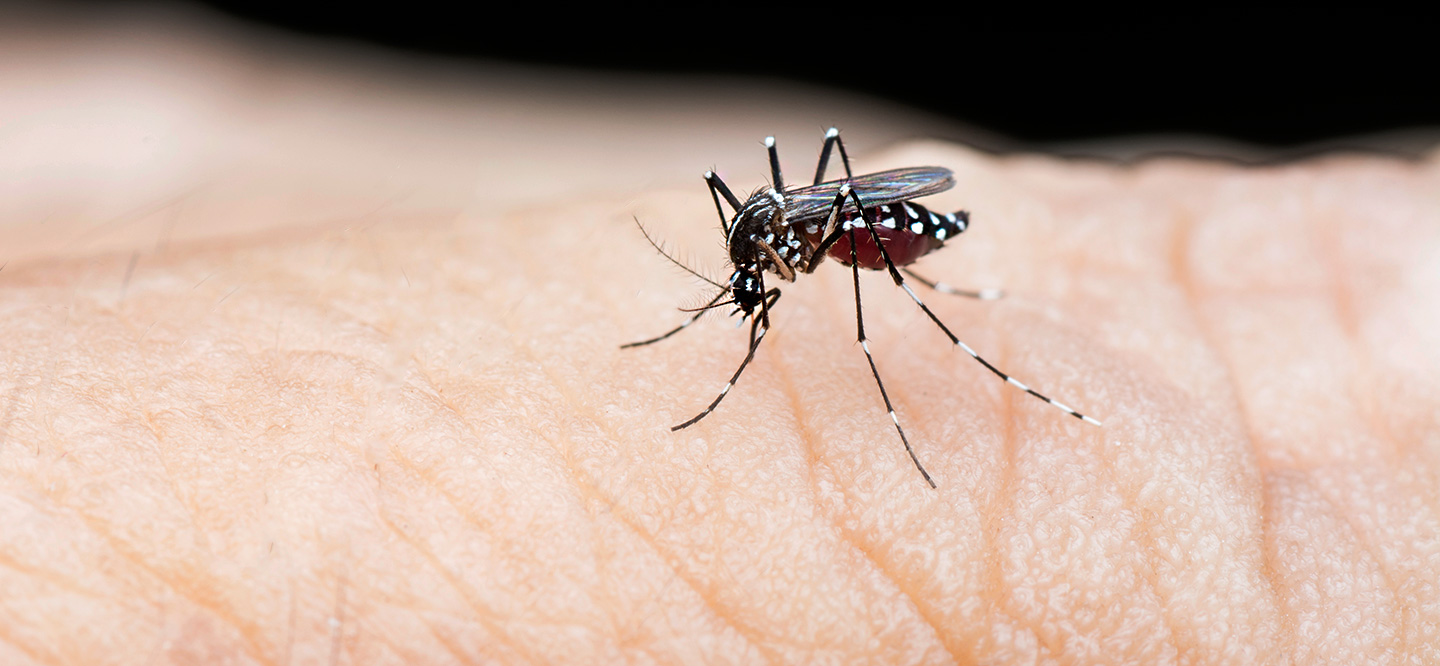
<font size="1">Photo taken from: Singapore National Environment Agency. Dengue & Zika. Available at: https://www.nea.gov.sg/dengue-zika [Accessed 22 Dec. 2022]. ‘Dengue’.</font>

### [Dataset] 

The dataset is named 'Weekly Number of Dengue Dataset,' and it was compiled by Singapore's Ministry of Health. The dataset may be obtained at [Data.gov.sg](https://data.gov.sg/dataset/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases), the official government website that makes available to the general public datasets on a range of statistics.

There are 5 independent variables that would be collected from the two dataset that span over the term of a decade. These variables consists of 'year', 'Week No.', 'Daily Rainfall', 'Mean temperature' and 'dengue count'. Weekly information of dengue clusters with infection records comes from National Environment Agency of Singapore [NEA](https://www.nea.gov.sg/dengue-zika/dengue/dengue-clusters). The mean temperature and rainfall values are recorded in a separate CSV file presumably acquired by web scrapping past climate trends in Singapore from [WeatherSpark.com](https://weatherspark.com/h/y/114655/2015/Historical-Weather-during-2015-in-Singapore#Figures-Rainfall), a metrology observation website. 

The data set is large enough to generate a data visualization showing the relationship between the independent factors and dengue incidence. To make the dataset easier to use, the observed year were incorporated in the models to account for yearly patterns throughout the decade. Furthermore, I will implement several machine learning algorithms on the dataset to predict dengue incidents in the future, namely **Logistic regression, k-nearest Neighbour and decision tree methods**. Performance and accuracy of fit of the models will be assessed using the root-mean-square error (RMSE).

Below are some codes to display the various data types of each variable and summary of the two datasets. The datasets will be cleaned, structured, and combined in the following steps to combine **one comprehensive dataset.**

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
#load the 2 csv file
df1 = pd.read_csv('Singapore.csv')
df2 = pd.read_csv('Weekly Dengue Cases.csv')

In [2]:
from IPython.display import display
#display the data types of each attribute
print(df1.dtypes)
print(df2.dtypes)
#display the dataset
display(df1)
display(df2)

Year                           int64
Week No.                       int64
Daily Rainfall Total (mm)    float64
Mean Temperature (C)         float64
dtype: object
year             int64
eweek            int64
type_dengue     object
number         float64
dtype: object


,Year,Week No.,Daily Rainfall Total (mm),Mean Temperature (C)
0,2012,1,1.839990,27.065217
1,2012,2,3.488352,26.472771
2,2012,3,15.048955,27.200941
3,2012,4,1.376449,26.809944
4,2012,5,8.257399,26.558095
...,...,...,...,...
407,2019,43,11.871970,27.312979
408,2019,44,3.706913,27.973810
409,2019,45,3.619977,28.819872
410,2019,46,2.235376,28.338643


,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0
...,...,...,...,...
525,2018,51,DHF,1.0
526,2018,52,Dengue,160.0
527,2018,52,DHF,0.0
528,2018,53,Dengue,NaN


### [Objectives of the project] 

The objective of this project is to visualize the data provided and utilize machine learning algorithms to train a model that could accurately predict future dengue outbreaks. The impact and contribution of such a model would be significant, as it could help public health officials and policymakers to take proactive measures to prevent the spread of dengue fever before any huge outbreaks.

For example, if the algorithm is able to predict that the incidence of dengue fever is likely to increase based on recent rainfall statistics, officials could take steps to reduce mosquito breeding sites, distribute insect repellent, or implement other public health measures to mitigate the risk of dengue transmission. Additionally, if the algorithm predicts that certain areas are at higher risk of experiencing outbreaks due to frequent rainfall and high humidity, resources could be directed to those areas to better address the threat of dengue.

Finally, the results of a dengue forecast algorithm may contribute to the overall understanding of the factors that influence the transmission of dengue fever, which could inform the development of more effective prevention and control strategies. By identifying patterns and relationships in the data that are associated with increased risk of dengue transmission, researchers and public health officials can gain valuable insights into the disease and how it spreads, which can inform the development of targeted interventions.

# *II. Implementation*

### [Data Pre-processing] 

The datasets were relatively clean, except for the dengue incidence that were recorded in a seperate dataset whereas climate data are stored in another. Dengue haemorrhagic fever cases should also removed from the dengue dataset, as such cases were far and few and not the main focus of this project. Therefore, the first process below will be used to clean the dengue dataset and  convert the database into First Normal Form(1NF).

In [3]:
#Reading the "Weekly Dengue Cases" CSV file BEFORE any cleaning 
df2 = pd.read_csv('Weekly Dengue Cases.csv')
# printing the first 5 rows of dataset
display(df2)

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0
...,...,...,...,...
525,2018,51,DHF,1.0
526,2018,52,Dengue,160.0
527,2018,52,DHF,0.0
528,2018,53,Dengue,NaN


#### The table must be single valued and should not consist of missing values

In [4]:
#Check if there is any missing variables
#Or any value that is not positive integer

missing_value = ['N/a','na','nan',np.nan]
df2 = pd.read_csv('Weekly Dengue Cases.csv', na_values = missing_value)
df1 = pd.read_csv('Singapore.csv', na_values = missing_value)
df2.isnull().sum()
df1.isnull().sum()
#Drop any NaN values
df2 = df2.dropna()
df1 = df1.dropna()

display(df2)

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0
...,...,...,...,...
523,2018,50,DHF,1.0
524,2018,51,Dengue,127.0
525,2018,51,DHF,1.0
526,2018,52,Dengue,160.0


#### Remove Dengue haemorrhagic fever(DHF) cases since it is not relevant in this project

In [5]:
# Dropping any rows containing DHF
df2 = df2[df2["type_dengue"].str.contains("DHF") == False]
#Rename the column from number to Dengue_number
df2 = df2.rename(columns={'number': 'Dengue_number'})
# Save as new CSV file
df2.to_csv('New_Dengue_Cases.csv')

#Display new Dataset
df2

,year,eweek,type_dengue,Dengue_number
0,2014,1,Dengue,436.0
2,2014,2,Dengue,479.0
4,2014,3,Dengue,401.0
6,2014,4,Dengue,336.0
8,2014,5,Dengue,234.0
...,...,...,...,...
518,2018,48,Dengue,109.0
520,2018,49,Dengue,113.0
522,2018,50,Dengue,107.0
524,2018,51,Dengue,127.0


#### Remove climate file years to only contain year 2014-2018

In [6]:
# delete all rows with column 'Year' has value below 2014
d1 = df1.drop(df1[df1['Year'] < 2014].index, inplace = True)
# delete all rows with column 'Year' has value above 2018
d1 = df1.drop(df1[df1['Year'] > 2018].index, inplace = True)
# Save as new CSV file
df1.to_csv('New_Singapore.csv')
#Display new dataset
df1

,Year,Week No.,Daily Rainfall Total (mm),Mean Temperature (C)
104,2014,1,3.456210,26.592556
105,2014,2,8.061746,26.538159
106,2014,3,0.025827,26.285000
107,2014,4,0.000000,25.810238
108,2014,5,0.000357,26.223190
...,...,...,...,...
360,2018,48,8.713978,27.479643
361,2018,49,8.521088,27.514524
362,2018,50,11.923381,27.171958
363,2018,51,4.726233,28.054615


#### Merge the two files to create a new comprehensive dataset 

In [7]:
# Read in the New CLimate CSV file
df4 = pd.read_csv('New_Singapore.csv')
# Read in the New Dengue CSV file
df3 = pd.read_csv('New_Dengue_Cases.csv')
# Select the dengue_number column to append from the second dataframe
column_to_append = df3['Dengue_number']
# Add the columns to the first dataframe
df4['Dengue_number'] = column_to_append
# save the updated dataframe lOCALLY as a new CSV file
df4.to_csv('updated_Singapore.csv', index=False)

#Display new dataset
df5 = pd.read_csv('updated_Singapore.csv')
# check each column has atomic values
for column in df5.columns:
    if not df5[column].apply(lambda x: isinstance(x, (int, float, str))).all():
        print(f'Column {column} is not 1NF')
    else:
        print(f'Column {column} is 1NF')
#display the data types of each attribute
print(df5.dtypes)
display(df5)

Column Unnamed: 0 is 1NF
Column Year is 1NF
Column Week No. is 1NF
Column Daily Rainfall Total (mm) is 1NF
Column Mean Temperature (C) is 1NF
Column Dengue_number is 1NF
Unnamed: 0                     int64
Year                           int64
Week No.                       int64
Daily Rainfall Total (mm)    float64
Mean Temperature (C)         float64
Dengue_number                float64
dtype: object


,Unnamed: 0,Year,Week No.,Daily Rainfall Total (mm),Mean Temperature (C),Dengue_number
0,104,2014,1,3.456210,26.592556,436.0
1,105,2014,2,8.061746,26.538159,479.0
2,106,2014,3,0.025827,26.285000,401.0
3,107,2014,4,0.000000,25.810238,336.0
4,108,2014,5,0.000357,26.223190,234.0
...,...,...,...,...,...,...
256,360,2018,48,8.713978,27.479643,109.0
257,361,2018,49,8.521088,27.514524,113.0
258,362,2018,50,11.923381,27.171958,107.0
259,363,2018,51,4.726233,28.054615,127.0


The datasets were relatively clean, since the missing variables were removed. The table does not contain composite or multi-valued attributes since they are fitted equally in each column,each row of table is unique and does not contain any repeating values. By fufilling these requirements the dataset is transformed into First Normal Form (1NF).

### [Statistical Analysis] 

This section will be focused on identifying key series of the dataset and provide statistical summary of the data. The central tendency of the data can be used to decribe the data by identifying summary statistics such as mean,median and mode.

In [8]:
#Measures Mean(average) of per year ############################
for i in range(2014,2019):
    filtered_df = df5.loc[(df5['Year'] == i)]
    # Calculate the mean of a Rainfall in the filtered dataframe
    Rainfall_mean = statistics.mean(filtered_df['Daily Rainfall Total (mm)'])
    # Calculate the mean of a temperature in the filtered dataframe
    Temperature_mean = statistics.mean(filtered_df['Mean Temperature (C)'])
    # Calculate the mean of a Dengue incidents in the filtered dataframe
    Dengue_mean = statistics.mean(filtered_df['Dengue_number'])
    
    data = {'Year': [i] ,
            'Average Rainfall (mm)': Rainfall_mean,
            'Average Temperature (C)': Temperature_mean,
             'Avergae Dengue Cases': Dengue_mean}
    df = pd.DataFrame(data)
    display(df)

,Year,Average Rainfall (mm),Average Temperature (C),Avergae Dengue Cases
0,2014,5.653466,27.857213,345.396226


,Year,Average Rainfall (mm),Average Temperature (C),Avergae Dengue Cases
0,2015,4.907074,28.112822,216.961538


,Year,Average Rainfall (mm),Average Temperature (C),Avergae Dengue Cases
0,2016,5.960347,28.362796,251.173077


,Year,Average Rainfall (mm),Average Temperature (C),Avergae Dengue Cases
0,2017,7.080943,27.85924,52.884615


,Year,Average Rainfall (mm),Average Temperature (C),Avergae Dengue Cases
0,2018,6.707895,27.823571,62.634615


In [9]:
#Measures Median stat per year ############################
# Calculate the median of the dataset
for i in range(2014,2019):
    filtered_df = df5.loc[(df5['Year'] == i)]
    # Calculate the median of a Rainfall in the filtered dataframe
    Rainfall_median = statistics.median(filtered_df['Daily Rainfall Total (mm)'])
    # Calculate the median of a temperature in the filtered dataframe
    Temperature_median = statistics.median(filtered_df['Mean Temperature (C)'])
    # Calculate the median of a Dengue incidents in the filtered dataframe
    Dengue_median = statistics.median(filtered_df['Dengue_number'])
    
    data = {'Year': [i] ,
            'Median Rainfall (mm)': Rainfall_median,
            'Median Temperature (C)': Temperature_median,
             'Median Dengue Cases': Dengue_median}
    df = pd.DataFrame(data)
    display(df)

,Year,Median Rainfall (mm),Median Temperature (C),Median Dengue Cases
0,2014,5.452107,27.964286,291.0


,Year,Median Rainfall (mm),Median Temperature (C),Median Dengue Cases
0,2015,3.587293,28.121978,225.5


,Year,Median Rainfall (mm),Median Temperature (C),Median Dengue Cases
0,2016,5.05426,28.322957,217.0


,Year,Median Rainfall (mm),Median Temperature (C),Median Dengue Cases
0,2017,6.313049,27.90179,51.0


,Year,Median Rainfall (mm),Median Temperature (C),Median Dengue Cases
0,2018,5.762674,27.832007,56.0


In [10]:
#Measures Mode stat per year ############################
## Mode is the highest occurring value throughout the year
for i in range(2014,2019):
    filtered_df = df5.loc[(df5['Year'] == i)]
    # Calculate the mode of a Rainfall in the filtered dataframe
    Rainfall_mode = statistics.mode(filtered_df['Daily Rainfall Total (mm)'])
    # Calculate the mode of a temperature in the filtered dataframe
    Temperature_mode = statistics.mode(filtered_df['Mean Temperature (C)'])
    # Calculate the mode of a Dengue incidents in the filtered dataframe
    Dengue_mode = statistics.mode(filtered_df['Dengue_number'])
    
    data = {'Year': [i] ,
            'Mode Rainfall (mm)': Rainfall_mode,
            'Mode Temperature (C)': Temperature_mode,
             'Mode Dengue Cases': Dengue_mode}
    df = pd.DataFrame(data)
    display(df)

,Year,Mode Rainfall (mm),Mode Temperature (C),Mode Dengue Cases
0,2014,3.45621,26.592556,186.0


,Year,Mode Rainfall (mm),Mode Temperature (C),Mode Dengue Cases
0,2015,9.109645,26.443537,259.0


,Year,Mode Rainfall (mm),Mode Temperature (C),Mode Dengue Cases
0,2016,0.843239,28.517959,219.0


,Year,Mode Rainfall (mm),Mode Temperature (C),Mode Dengue Cases
0,2017,3.244902,27.821526,51.0


,Year,Mode Rainfall (mm),Mode Temperature (C),Mode Dengue Cases
0,2018,11.148579,26.490109,75.0


In [11]:
# displays a statistical summary of the dataframe
df5.describe()

,Unnamed: 0,Year,Week No.,Daily Rainfall Total (mm),Mean Temperature (C),Dengue_number
count,261.00000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,234.00000,2015.992337,26.601533,6.060380,28.002569,186.421456
std,75.48841,1.419622,15.097702,4.387769,0.815682,158.706595
min,104.00000,2014.000000,1.000000,0.000000,25.232679,24.000000
25%,169.00000,2015.000000,14.000000,2.722892,27.443857,60.000000
50%,234.00000,2016.000000,27.000000,5.263709,28.022381,157.000000
75%,299.00000,2017.000000,40.000000,8.623863,28.567206,250.000000
max,364.00000,2018.000000,53.000000,21.636385,29.939006,888.000000


Because the describe function summaries the complete dataset rather than calculating on a per year basis, the per year analysis of the independent variables is significantly more comprehensive and beneficial if the user just wants to analyze how the data performed on selective years.

### [Measures of Spread] 

Measures of spread, also known as measures of dispersion, describe how spread out the values in a dataset are. This can be achieved by calculating the statistical range, interquartile range (IQR), varaince as well as standard deviation of the ``Dengue Cases`` over the span of **2014-2018 on a per year basis.** 

In [12]:
# Find the Min and Max to calculate the Range
for i in range(2014,2019):
    filtered_df = df5.loc[(df5['Year'] == i)]
    # Calculate the max and min of a Rainfall in the filtered dataframe
    maxDengue_No = filtered_df['Dengue_number'].max()
    minDengue_No = filtered_df['Dengue_number'].min()
    # calculate interquartile range = max - min
    rangeDengue_No = maxDengue_No - minDengue_No
    
    # Find the Quartiles
    firstQ = filtered_df['Dengue_number'].quantile(0.25)
    # Calculate the median of a Dengue incidents in the filtered dataframe
    Dengue_median = statistics.median(filtered_df['Dengue_number'])
    thirdQ = filtered_df['Dengue_number'].quantile(0.75)
    # Find the InterQuartile Range, Q3 - Q1
    IQR = thirdQ - firstQ
    # Find Variance & Standard Deviation
    variance = filtered_df['Dengue_number'].var()
    stanDev = filtered_df['Dengue_number'].std()
    
    ###### Print Data #############
    data = {'Year': [i] ,
            'Max Dengue Incident': maxDengue_No,
            'Min Dengue Incident': minDengue_No,
             'Dengue Range': rangeDengue_No,
             'First Quartile': firstQ,
              'Median Quartile': Dengue_median,
              'Third Quartile': thirdQ,
             'IQR': IQR,
              'Varaince': variance,
              'Standard Deviation': stanDev}
    df = pd.DataFrame(data)
    display(df)

,Year,Max Dengue Incident,Min Dengue Incident,Dengue Range,First Quartile,Median Quartile,Third Quartile,IQR,Varaince,Standard Deviation
0,2014,888.0,149.0,739.0,212.0,291.0,436.0,224.0,30310.051524,174.097822


,Year,Max Dengue Incident,Min Dengue Incident,Dengue Range,First Quartile,Median Quartile,Third Quartile,IQR,Varaince,Standard Deviation
0,2015,457.0,90.0,367.0,168.25,225.5,256.25,88.0,5692.429864,75.448193


,Year,Max Dengue Incident,Min Dengue Incident,Dengue Range,First Quartile,Median Quartile,Third Quartile,IQR,Varaince,Standard Deviation
0,2016,636.0,59.0,577.0,132.25,217.0,302.75,170.5,25644.145928,160.137897


,Year,Max Dengue Incident,Min Dengue Incident,Dengue Range,First Quartile,Median Quartile,Third Quartile,IQR,Varaince,Standard Deviation
0,2017,90.0,24.0,66.0,40.0,51.0,62.25,22.25,214.613876,14.649706


,Year,Max Dengue Incident,Min Dengue Incident,Dengue Range,First Quartile,Median Quartile,Third Quartile,IQR,Varaince,Standard Deviation
0,2018,160.0,24.0,136.0,47.25,56.0,74.25,27.0,657.334465,25.638535


### [Type of Distribution] 

To determine the type of distribution of a dataset one way is to plot a histogram or a density plot of the data to visually inspect the shape of the distribution.

Judging from the way the graph is plotted it shows a skewed distribution specifically, it is LEFT-SIDE Skewed by 0.84 


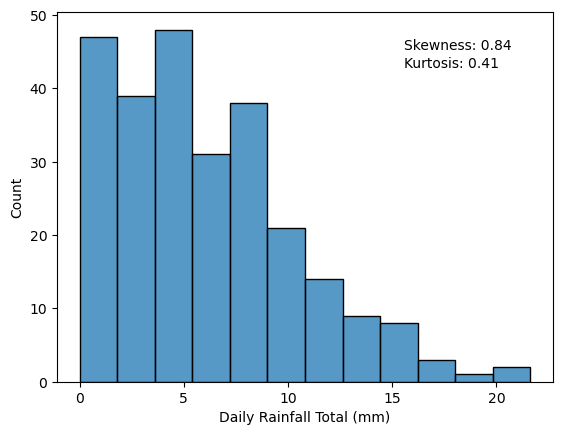

In [13]:
skewness = skew(df5['Daily Rainfall Total (mm)'])
kurt = kurtosis(df5['Daily Rainfall Total (mm)'])
# plotting histogram to check the type of distribution of Dengue Numbers
sns.histplot(df5['Daily Rainfall Total (mm)'])

# Add the skewness and kurtosis values to the plot
plt.text(x=0.7, y=0.9, s=f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)
plt.text(x=0.7, y=0.85, s=f"Kurtosis: {kurt:.2f}", transform=plt.gca().transAxes)
print("Judging from the way the graph is plotted it shows a skewed distribution specifically, it is LEFT-SIDE Skewed by 0.84 ")

Judging from the way the graph is plotted it shows a Normal Distribution pattern 


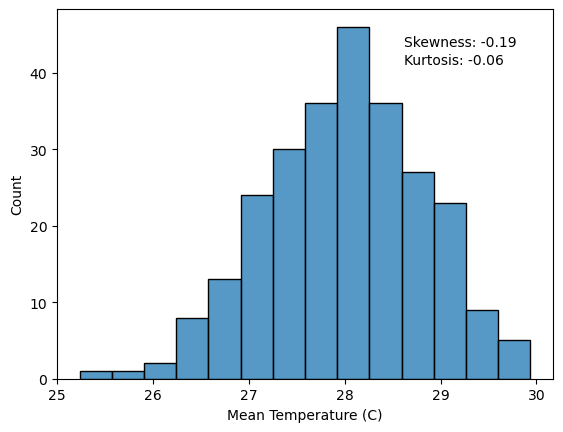

In [14]:
skewness = skew(df5['Mean Temperature (C)'])
kurt = kurtosis(df5['Mean Temperature (C)'])
# plotting histogram to check the type of distribution of Dengue Numbers
sns.histplot(df5['Mean Temperature (C)'])

# Add the skewness and kurtosis values to the plot
plt.text(x=0.7, y=0.9, s=f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)
plt.text(x=0.7, y=0.85, s=f"Kurtosis: {kurt:.2f}", transform=plt.gca().transAxes)
print("Judging from the way the graph is plotted it shows a Normal Distribution pattern ")

Judging from the way the graph is plotted it shows a skewed distribution specifically, it is LEFT-SIDE Skewed by 1.52. 


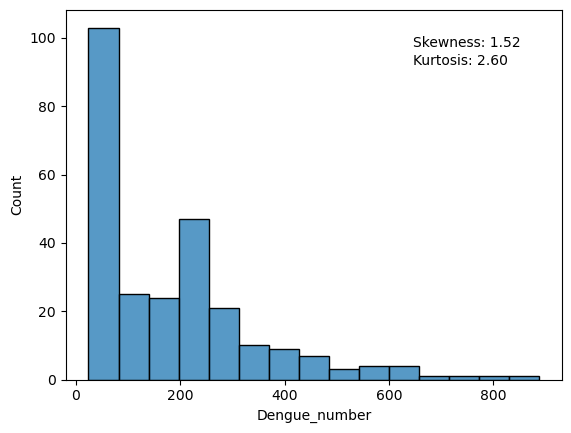

In [15]:
skewness = skew(df5['Dengue_number'])
kurt = kurtosis(df5['Dengue_number'])
# plotting histogram to check the type of distribution of Dengue Numbers
sns.histplot(df5['Dengue_number'])

# Add the skewness and kurtosis values to the plot
plt.text(x=0.7, y=0.9, s=f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)
plt.text(x=0.7, y=0.85, s=f"Kurtosis: {kurt:.2f}", transform=plt.gca().transAxes)
print("Judging from the way the graph is plotted it shows a skewed distribution specifically, it is LEFT-SIDE Skewed by 1.52. ")

## Data Visualization

In this segment, I will be utilizing data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in the data. This is to allow us to understand and explore the variables in great depth before moving on to building a model.

##### Histogram &  Scatter Plot Each Year

Based on the plot below we can observe the recording of each independent variable druing the years from 2014-2018.
Furthermore, the scatter plot also shows us how each variable might have a correlation effect on the other.

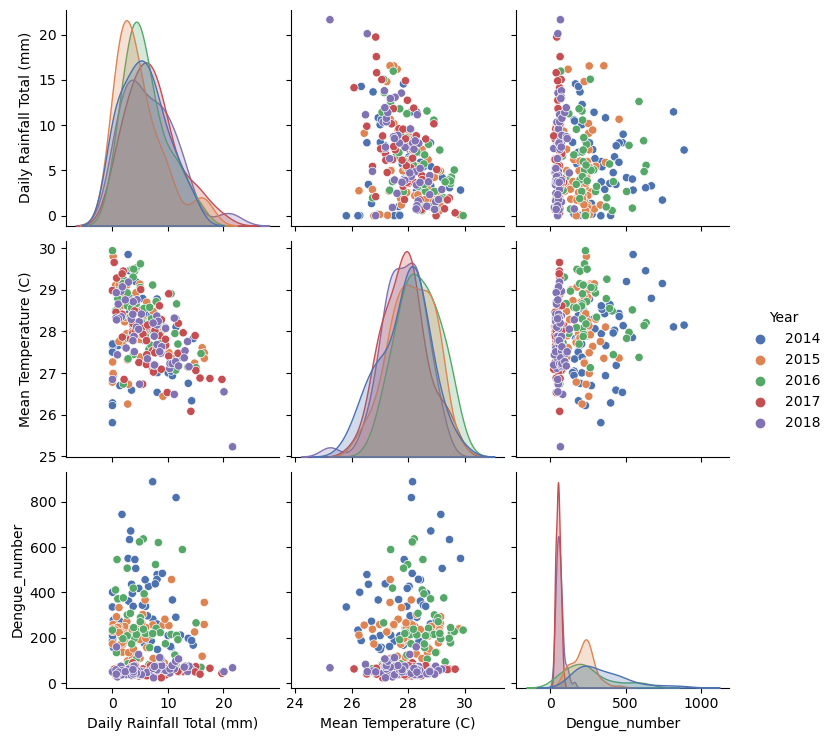

In [16]:
# Select the columns to plot
columns = ['Daily Rainfall Total (mm)', 'Mean Temperature (C)', 'Dengue_number']
# Use the pairplot function to plot the columns
sns.pairplot(df5, vars=columns, hue='Year', palette="deep")

#### Find which variables have correlation on dengue cases 

<AxesSubplot:xlabel='Year', ylabel='Dengue_number'>

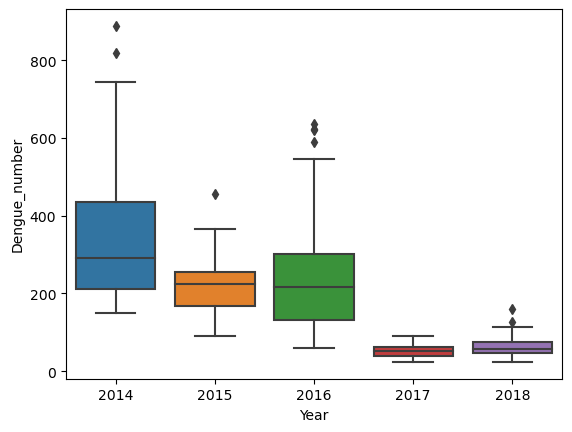

In [17]:
sns.boxplot(data= df5,x='Year', y='Dengue_number', )
# the graph below shows a sharp decrease in dengue cases in 2017 and 2018

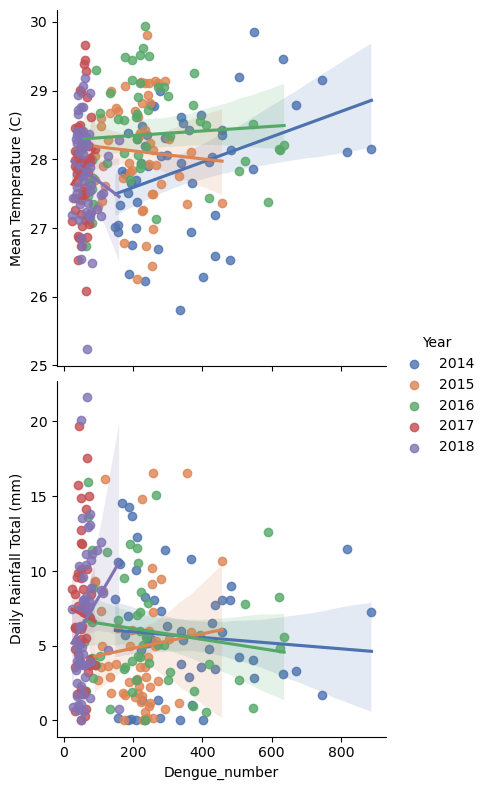

In [18]:
# Focus the visualization of Dengue_number
sns.pairplot(df5, 
             x_vars = ["Dengue_number"],
             y_vars =["Mean Temperature (C)", "Daily Rainfall Total (mm)"],
             height = 4,
             kind = "reg",
             hue='Year', palette="deep")

The line of regression in the plot above is messy and in many cases it does not provide a diagonal line. Therefore understanding which of these variables are correlated to the dengue occurances is the aim of the analysis below. It is apparent from the plot above that certain years needs to be removed as **the dengue numbers are too small** to provide an accurate prediction of the dataset.

#### Applying Simple Linear Regression
Exclude data that consist of no correlation, such as daily rainfall due to the graph not showing any upward trends. As the scatter plot is a horizontal line of regression at that time period. This is likely due to the low number of rainfall recorded at that time period, it causes the reading to be concentrated in a vertical line with no expansion to the y-axis. 

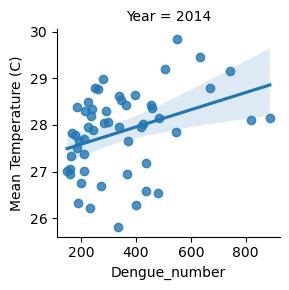

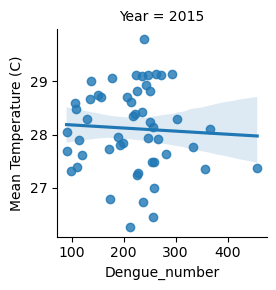

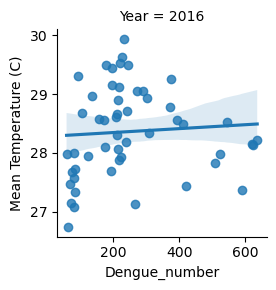

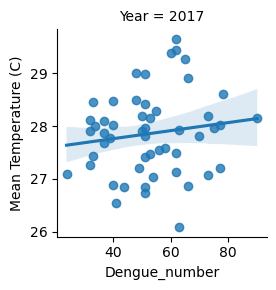

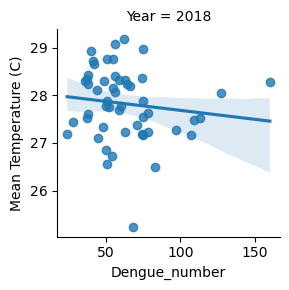

In [19]:
for i in range(2014,2019):
    filtered_df = df5.loc[(df5['Year'] == i)]
    g = sns.FacetGrid(filtered_df, col='Year')
    g.map(sns.regplot, 'Dengue_number','Mean Temperature (C)')

Based on the scatter plot, there exist a correlation between average temperatures and the high dengue occurances. Discounting the parts where the  linear regression shows an uniform line of fitting with no diagonal upward trend. The year 2014 is chosen as our main model since it has a wide sample size as well as positive correlation to the dengue cases as observed.

## Implement ML model

The key features that have been identified are ``Mean Temperature``, ``Daily Rainfall`` both variables seem to have an impact on the Dengue cases. Additionally, it is assumed that a linear regression model above would not work since the scatter data is not near linear line of fit. Therefore, the model below is trained to predict about the target, which is the Dengue_number vairable.

In [20]:
# import data
data = pd.read_csv('updated_Singapore.csv')
data.columns
clean_data = data.loc[:, ['Daily Rainfall Total (mm)', 'Mean Temperature (C)',
                           'Dengue_number']]
clean_data.columns = ['rainfall', 'temp', 'dengue'] # Use these columns to simplify description
# this means that as long as dengue > 225, it's considered an outbreak
labels = np.where(clean_data.loc[:, 'dengue'] > 225, 1, 0)
labels = list(labels)
clean_data['label'] = labels

X = clean_data.loc[:, ['rainfall', 'temp']]
y = clean_data.loc[:, 'label']
# Split train and test data with 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)


#### Apply Logistic Regression

In [21]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Evaluation
print("Accuracy Score : ",accuracy_score(y_test, y_pred_logreg))
print("Precision Score : ",precision_score(y_test, y_pred_logreg,average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred_logreg,average='macro'))

Accuracy Score :  0.9622641509433962
Precision Score :  0.5
Recall Score :  0.4811320754716981


C:\Users\shenf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Apply k - Nearest Neighbour

In [22]:
## k - Nearest Neighbors

knn_model = KNeighborsClassifier(n_neighbors = 14) 
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("Accuracy Score : ",accuracy_score(y_test, y_pred_knn))
print("Precision Score : ",precision_score(y_test, y_pred_knn,average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred_knn,average='macro'))

Accuracy Score :  0.8490566037735849
Precision Score :  0.5
Recall Score :  0.42452830188679247


C:\Users\shenf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\shenf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Apply Decision Tree

In [23]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("Accuracy Score : ",accuracy_score(y_test, y_pred_tree))
print("Precision Score : ",precision_score(y_test, y_pred_tree,average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred_tree,average='macro'))

Accuracy Score :  0.5283018867924528
Precision Score :  0.5
Recall Score :  0.2641509433962264


C:\Users\shenf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# *III. Conclusion*

### [Results of the ML model - RMSE]

There are 3 different models developed to predict the dengue occurrences and each with varying degrees of accuracy. The Decision tree and KNN method are both **not viable**, because of their poor accuracy score. Based on our data, the logistic regression approach is the best model for predicting dengue cases. But to test whether the kNN model is a good model for predicting the data, I need to use  the RMSE value to measure the average difference between values predicted by a model and the actual values.

In [24]:
# calculate the mean squared error
#Use the KNN prediction as model to be tested
mse = mean_squared_error(y_test, y_pred_logreg)
# calculate the RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.19425717247145283


RSME is the standard deviation of how inconsistent the predicted values are from the true data; it is extremely useful for judging a model's performance by scoring how far apart the projected values are from the true data. The lower the value of the RMSE, the better the model is. As such the Logistic Regression model with a RMSE score of ``0.19426`` is a relatively good fit.

### [Evaluation]

A dengue prediction model can help to increase our understanding of the factors that influence dengue transmission, such as weather, demographics and hygiene conditions. This can inform the development of more effective control measures and policies. 

From the graphs above we can visualize that the temperature and rainfall variables have a statistically significant relationship with the high dengue cases. This is evident in the scatter plot trend, where high dengue cases are clustered in the average temperature range of 28 and 29 degrees Celsius. This pattern is emphasized further by the fact that the average rainfall at these conditions is the lowest, which presumably adds to the dry weather and high temperatures. This creates an ideal environment for the dengue mosquito to infestate in large numbers.

I have investigated various machine learning algorithms to predict dengue numbers in the future and conclude that the Logistic Regression algorithm (out of the 3 models explored) has the highest accuracy score. The model could explain 96% of the variance in the log of weekly dengue cases in Singapore and generalizes well. To improve the performance of this model, other feature variables can be taken into consideration, such as hygiene factors, population density and fumigation rates. The more the observations and variable to play around with, the better the prediction.

### [References]

Photo taken from: Singapore National Environment Agency. Dengue & Zika. [Dengue.jpg] ,Available at: https://www.nea.gov.sg/dengue-zika [Accessed 22 Dec. 2022]. ‘Dengue’.

Singapore Open Data Licence (2018). Weekly Number of Dengue Cases. [online] Available at: https://data.gov.sg/dataset/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases [Accessed 23 Dec. 2022].

National Environmental Agency Singapore (2019). Weekly information of dengue clusters. Dengue Clusters. [online] Available at: https://www.nea.gov.sg/dengue-zika/dengue/dengue-clusters [Accessed 23 Summer 2022].

Weather Spark (2019). Weather History in Singapore. [online] Available at: https://weatherspark.com/h/y/114655/2015/Historical-Weather-during-2015-in-Singapore#Figures-Rainfall [Accessed 23 Dec. 2022].
